In [ ]:
import time
import os
import pickle
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.ioff()
import numpy as np
#from scipy.spatial.distance import pdist, squareform
from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.autograd import Variable

# Set random seed
np.random.seed(1)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Import Dataset

In [ ]:
# file = open('traitData.pkl', 'rb')
# # -- Your code here -- #

# data_dictionary = pickle.load(file)

# trait_names = data_dictionary['names']
# trait_data = data_dictionary['data']

# # -------------------- #
# file.close()

import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your file
data = pd.read_csv('/content/Copy of hals_biomarker_ld_07dec23 - Cols Deleted and Preprocessed - Empty items filled with average.csv')
# data = pd.read_csv('/content/drive/MyDrive/5th Semester/CLPS 1291/CLPS1291 Final Project/Copy of hals_biomarker_ld_07dec23 - Cols Deleted.csv')

# print(data)

# Access remaining data
# trait_names = data.iloc[0].tolist()
trait_names = list(data.columns)
trait_data = data.iloc[0:].values

print(trait_names)

['Family_History_AD_1', 'Type_of_Schools_1', 'Type_of_Schools_1a', 'Type_of_Schools_2', 'Lifetime_Work_2', 'Background_1', 'Background_1_1_TEXT', 'SES_4', 'Tobacco_1a_35', 'Tobacco_1_25', 'Tobacco_1_50', 'Weight', 'Height', 'Waist', 'Hip', 'HVLT1C60', 'HVLT2C60', 'HVLT3C60', 'HVLTDTTP60', 'HVLTDSRFP60', 'HVLTDSUFP60', 'HVLTDTFP60', 'HVLTDRT_RT_2_1', 'CTSCORES_1_2', 'CTSCORES_2_2', 'StroopIT', 'WAIS_R_values_1_2', 'WAIS_R_values_2_2', 'WAIS_R_values_3_2', 'WAIS_R_values_4_2', 'WAIS_R_values_5_2', 'WRAT_Reading_1_2', 'WMSRAW_1_3', 'WMSRAW_2_3', 'BNT_TotalScore', 'Sleep_4', 'Cancer_1', 'Ab40', 'Ab42', 'NFL', 'GFAP', 'pTau181', 'pTau231', 'pTau217', 'DEMO0D', 'AGE7', 'C31', 'ged', 'LDHEINDEL3', 'white', 'sex', 'SH1E2R', 'fsiq', 'rstand', 'sstand', 'astand', 'viq', 'piq', 'infos', 'vocabs', 'dspans', 'parrs', 'bdesns', 'codes', 'VIQ35', 'COMPS35', 'VOCS35', 'PARRS35', 'BDS35', 'fastc', 'lmimmtot', 'bntspon', 'bnttotal', 'DEMO6I', 'INTVW_AGE', 'comps', 'DSPANS35', 'lmdeltot', 'INFS35', 'strp

Run PCA

In [ ]:
from sklearn.impute import SimpleImputer

pca = PCA()

imputer = SimpleImputer(strategy='mean')
transformed_data = imputer.fit_transform(trait_data)

transformed_data = pca.fit_transform(transformed_data)

principal_coefficients = pca.components_

explained_ratio_by_components = pca.explained_variance_ratio_

Function to Plot Eigenvectors

In [ ]:
def biplot(data, pc_coeff, labels):
    plt.figure()
    xs = data[:,0]
    ys = data[:,1]
    n = pc_coeff.shape[1]
    xs = xs/(xs.max() - xs.min())
    ys = ys/(ys.max() - ys.min())
    plt.scatter(xs, ys )
    for i in range(n):
        print(labels[i], pc_coeff[0,i], pc_coeff[1,i])
        plt.arrow(0, 0, pc_coeff[0,i], pc_coeff[1,i], color = 'r', alpha = 0.7)
        plt.text(pc_coeff[0,i] + np.sign(pc_coeff[0,i]) * 0.02, pc_coeff[1,i] + np.sign(pc_coeff[1,i]) * 0.02, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Data projected into Eigenvector Space')
    plt.grid()
    plt.show()

Projecting Variables in Eigenspace

Family_History_AD_1 -3.910856750788394e-05 -0.0009100631877510534
Type_of_Schools_1 0.000713804114845451 -0.0010596121781035195
Type_of_Schools_1a 0.0 -2.220446049250313e-16
Type_of_Schools_2 0.00037385053128940847 -0.0008413569804479604
Lifetime_Work_2 0.000486112155122079 -0.0007225911928374906
Background_1 6.617444900424222e-24 6.938893903907228e-18
Background_1_1_TEXT -0.0006744842533857295 -0.002093886516433382
SES_4 -0.003438140112520293 0.0009935767817439928
Tobacco_1a_35 -0.00017260997147964578 3.7675729984998556e-05
Tobacco_1_25 0.00014253809019813723 0.0004910973418491986
Tobacco_1_50 0.0003888543355726938 0.0008995317134152997
Weight 0.02681444938238699 -0.25853137006958476
Height -0.0012370394660614426 -0.02009250129407338
Waist 0.02275380131705256 -0.04354773265123953
Hip 0.01613901789425942 -0.020222537219328117
HVLT1C60 -0.0010645406004620925 0.000780681023302279
HVLT2C60 -0.000677311229293914 0.0022539430114776955
HVLT3C60 -0.0010279600194743564 0.0014176959075371625
HV

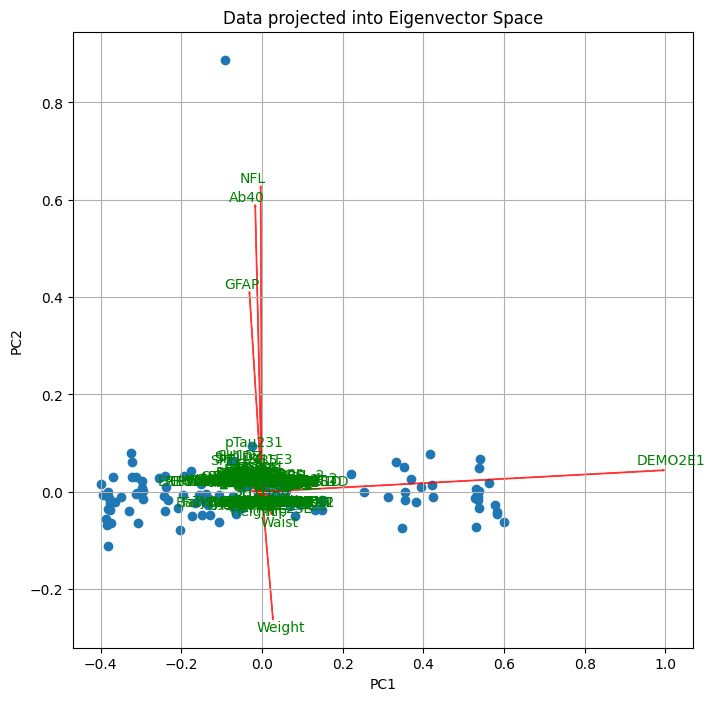

In [ ]:
biplot(transformed_data, principal_coefficients, trait_names)

Calculating Cummlative Variance

In [ ]:
faces_explained_ratio_by_components = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(faces_explained_ratio_by_components)

n = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to explain at least 95% of variance: {n}")

component_explaining_variance = explained_ratio_by_components[:n]

print(f"Component explaining at least 95% of variance: {component_explaining_variance}")

Number of components needed to explain at least 95% of variance: 8
Component explaining at least 95% of variance: [0.79368666 0.0548636  0.03394198 0.02235803 0.02123407 0.01121905
 0.00989474 0.00866503]


Plotting Cumm Variance

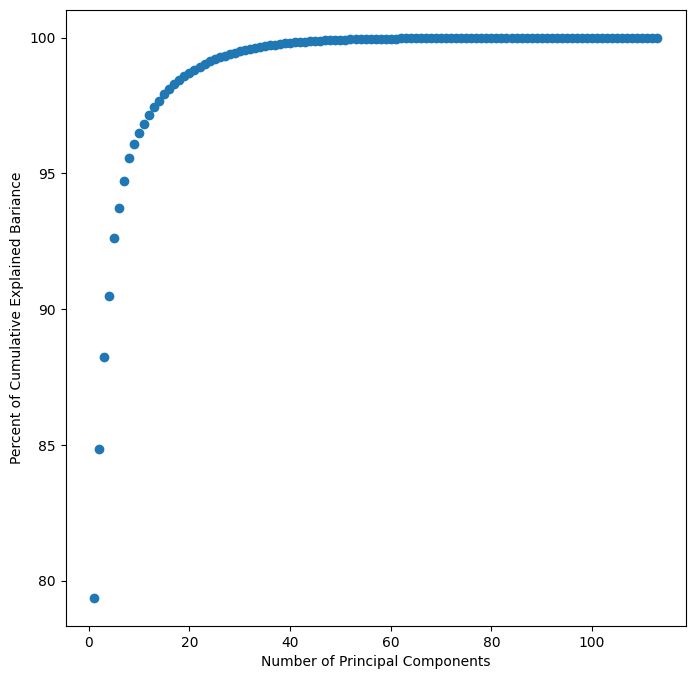

In [ ]:
plt.figure()

plt.scatter(range(1, len(cumulative_variance) + 1), cumulative_variance * 100)

plt.xlabel('Number of Principal Components')
plt.ylabel('Percent of Cumulative Explained Bariance')

plt.show()

In [ ]:
principal_components_df = pd.DataFrame(principal_coefficients, columns=trait_names)

principal_components_df = principal_components_df.abs().sort_values(by=trait_names, ascending=False)

________________________________________________
SVM

In [ ]:
from sklearn.svm import SVR # "Support vector classifier"
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

model = SVR(kernel='linear', C = 1E10)


# Separate features and target
# X = data.drop("Ab40",	"Ab42",	"NFL",	"GFAP",	"pTau181",	"pTau231",	"pTau217", axis=1)
# y = data[("Ab40",	"Ab42",	"NFL",	"GFAP",	"pTau181",	"pTau231",	"pTau217")]

dependent_variables = ["Ab40",	"Ab42",	"NFL",	"GFAP",	"pTau181",	"pTau231",	"pTau217"]

X = data.drop(dependent_variables, axis = 1)
y = data[dependent_variables[0]]

print(y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate model
accuracy = mean_squared_error(y_test, y_pred)
print("Accuracy:", accuracy)
print("MEDIAN:", np.median(y))
print("STD:", np.std(y))



0       59.0
1      118.0
2      110.0
3       89.1
4      145.0
       ...  
108     99.6
109     79.4
110     97.1
111    117.0
112     89.2
Name: Ab40, Length: 113, dtype: float64
Accuracy: 8336.687427688661
MEDIAN: 96.9
STD: 51.05501859409316


Reference: https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb#scrollTo=EXxuhmx1ySBD